# Libraries Used

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

# Setting inicial

In [14]:
crypro_currency=input("Enter the Currency :")
against_currency=input("Which Currecy Do you want to use for reference : ")

Enter the Currency :btc
Which Currecy Do you want to use for reference : inr


In [15]:
start=dt.datetime(2016,1,1)
end=dt.datetime.now()

In [16]:
data= web.DataReader(f'{crypro_currency}-{against_currency}','yahoo',start,end)

# How The Data Looks

In [17]:
print(data.head())

                    High           Low          Open         Close  \
Date                                                                 
2015-12-31  28659.066406  27719.962891  28300.330078  28503.232422   
2016-01-01  28864.216797  28273.705078  28513.429688  28763.769531   
2016-01-02  28878.207031  28600.589844  28782.841797  28704.431641   
2016-01-03  28724.630859  28096.636719  28713.703125  28467.287109   
2016-01-04  28897.769531  28404.460938  28470.597656  28842.994141   

                Volume     Adj Close  
Date                                  
2015-12-31  3044942722  28503.232422  
2016-01-01  2402570153  28763.769531  
2016-01-02  1993147335  28704.431641  
2016-01-03  2623809084  28467.287109  
2016-01-04  2562524545  28842.994141  


# sclaring the data from 0 to 1 

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [19]:
print(scaled_data)

[[0.00076754]
 [0.00081996]
 [0.00080802]
 ...
 [0.64050872]
 [0.63802062]
 [0.64334799]]


# For prediction we will be using 60 days in the past 

In [5]:
prediction_days=60
future_day=10

In [26]:
x_train,y_train=[],[]

In [27]:
for x in range(prediction_days,len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])

In [28]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [29]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))

# Create the Neural Network for Prediction

In [30]:
model = Sequential()

In [31]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
model.fit(x_train,y_train,epochs=30, batch_size=32)

Epoch 1/30
7/7 [==============================] - 13s 1s/step - loss: 0.2887
Epoch 2/30
7/7 [==============================] - 12s 2s/step - loss: 0.0623
Epoch 3/30
7/7 [==============================] - 13s 2s/step - loss: 0.0418
Epoch 4/30
7/7 [==============================] - 13s 2s/step - loss: 0.0272
Epoch 5/30
7/7 [==============================] - 13s 2s/step - loss: 0.0212
Epoch 6/30
7/7 [==============================] - 14s 2s/step - loss: 0.0210
Epoch 7/30
7/7 [==============================] - 13s 2s/step - loss: 0.0200
Epoch 8/30
7/7 [==============================] - 13s 2s/step - loss: 0.0189
Epoch 9/30
7/7 [==============================] - 13s 2s/step - loss: 0.0191
Epoch 10/30
7/7 [==============================] - 13s 2s/step - loss: 0.0198
Epoch 11/30
7/7 [==============================] - 14s 2s/step - loss: 0.0165
Epoch 12/30
7/7 [==============================] - 13s 2s/step - loss: 0.0162
Epoch 13/30
7/7 [==============================] - 13s 2s/step - loss: 0.

#  Testing the Model

In [33]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()

In [34]:
test_data= web.DataReader(f'{crypro_currency}-{against_currency}','yahoo',test_start,test_end)

In [35]:
actual_price=test_data['Close'].values

In [36]:
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

In [37]:
modle_inputs= total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

In [38]:
modle_inputs=modle_inputs.reshape(-1,1)
modle_inputs=scaler.fit_transform(modle_inputs)

In [39]:
x_test=[]

In [40]:
for x in range(prediction_days,len(modle_inputs)):
    x_test.append(modle_inputs[x-prediction_days:x,0])

In [41]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [42]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

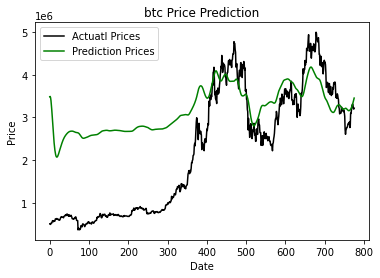

In [43]:
plt.plot(actual_price,color='black',label='Actuatl Prices')
plt.plot(prediction_prices,color='green',label='Prediction Prices')
plt.title(f'{crypro_currency} Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Predict Next Day

In [44]:
real_data=[modle_inputs[len(modle_inputs)+1- prediction_days:len(modle_inputs)+1,0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [45]:
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)

In [46]:
print(prediction)

[[3486488.5]]


In [1]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Running setup.py install for fbprophet: started
  Running setup.py install for fbprophet: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [12 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efcc0cf9 NOW.
  stanfit4anon_model_f5236004a3fd5b8429270d00efcc0cf9_3108433162232952594.cpp
  C:\ProgramData\Anaconda3\include\pyconfig.h(59): fatal error C1083: Cannot open include file: 'io.h': No such file or directory
  error: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\Community\\VC\\Tools\\MSVC\\14.29.30133\\bin\\HostX86\\x64\\cl.exe' failed with exit status 2
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  error: subprocess-exited-with-error
  
  Running setup.py install f

In [4]:
conda install gcc

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


